In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df_original = dataset['train'].to_pandas()

# Data Cleansing
df_original['job_posted_date'] = pd.to_datetime(df_original['job_posted_date'])
df_original['job_skills'] = df_original['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_altered = df_original.copy()

In [6]:
# only gets Data Analyst jobs in the US
df_DA_US = df_altered[(df_altered['job_title_short']== 'Data Analyst') & (df_altered['job_country']== 'United States')]

(20000.0, 250000.0)

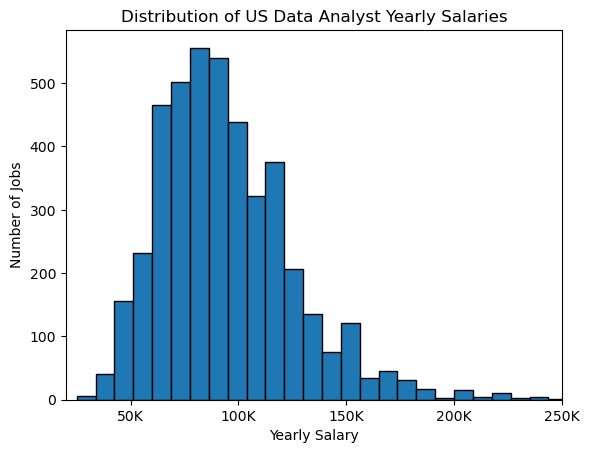

In [20]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, position: f'{int(x/1000)}K'))
plt.title('Distribution of US Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.xlim(20000,250000)